In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


In [6]:
N = 4  # Cambiar el nuemro de atomos, debe ser par porque se le agregan son anilos
V_1 = sp.symbols('V_1')
V_2 = sp.symbols('V_2')
g_1 = sp.symbols('g_1')

equations = []

# Inicializar las ecuaciones
for i in range(1, N + 1):
    if i == 1:
        equations.append(f'G{i}{N} = g_1 V_1 G{i+1}{N}')
    elif i == N:
        equations.append(f'G{i}{N} = g_1 + g_1 V_1 G{i-1}{N}')
    elif i == 2:
        equations.append(f'G{i}{N} = g_1 V_2 G{i+1}{N} + g_1 V_1 G{i-1}{N}')
    elif 2 <= i <= N-2:
        equations.append(f'G{i}{N} = g_1 V_2 G{i+1}{N} + g_1 V_2 G{i-1}{N}')
    else:
        equations.append(f'G{i}{N} = g_1 V_1 G{i+1}{N} + g_1 V_2 G{i-1}{N}')

# Imprimir la lista de ecuaciones
print("Lista de ecuaciones:")
for equation in equations:
    print(equation)


Lista de ecuaciones:
G14 = g_1 V_1 G24
G24 = g_1 V_2 G34 + g_1 V_1 G14
G34 = g_1 V_1 G44 + g_1 V_2 G24
G44 = g_1 + g_1 V_1 G34


In [7]:
# Parte nueva para crear la matriz
matrix = sp.zeros(N, N)

# Llenar la matriz con términos negativos fuera de la diagonal principal
for i in range(N):
    for j in range(N):
        if i == j:
            matrix[i, j] = 1
        elif i == j + 1:
            matrix[i, j] = -V_1 * g_1 if (j == 0 or j == N - 2) else -V_2 * g_1
        elif i + 1 == j:
            matrix[i, j] = -V_1 * g_1 if (i == 0 or i == N - 2) else -V_2 * g_1

# Imprimir la matriz
print("\nMatriz de ecuaciones:")
sp.pprint(matrix)




Matriz de ecuaciones:
⎡  1     -V₁⋅g₁    0       0   ⎤
⎢                              ⎥
⎢-V₁⋅g₁    1     -V₂⋅g₁    0   ⎥
⎢                              ⎥
⎢  0     -V₂⋅g₁    1     -V₁⋅g₁⎥
⎢                              ⎥
⎣  0       0     -V₁⋅g₁    1   ⎦


In [8]:
# Parte nueva para calcular el determinante
determinante = matrix.det()
print("\nDeterminante de la matriz:")
sp.pprint(determinante)

# Parte nueva para cambiar la primera columna
new_column = sp.Matrix([0]*(N-1) + [g_1])
matrix[:, 0] = new_column

# Imprimir la matriz modificada
print("\nMatriz de ecuaciones con la primera columna cambiada:")
sp.pprint(matrix)

# Calcular e imprimir el determinante de la matriz modificada
determinante_modificado = matrix.det()
print("\nDeterminante de la matriz modificada:")
sp.pprint(determinante_modificado)




Determinante de la matriz:
  4   4       2   2     2   2    
V₁ ⋅g₁  - 2⋅V₁ ⋅g₁  - V₂ ⋅g₁  + 1

Matriz de ecuaciones con la primera columna cambiada:
⎡0   -V₁⋅g₁    0       0   ⎤
⎢                          ⎥
⎢0     1     -V₂⋅g₁    0   ⎥
⎢                          ⎥
⎢0   -V₂⋅g₁    1     -V₁⋅g₁⎥
⎢                          ⎥
⎣g₁    0     -V₁⋅g₁    1   ⎦

Determinante de la matriz modificada:
  2      4
V₁ ⋅V₂⋅g₁ 


In [9]:
# Parte nueva para cambiar la primera columna
new_first_column = sp.Matrix([1] + [-V_1 * g_1] + [0] * (N - 2))
matrix[:, 0] = new_first_column

# Parte nueva para cambiar la última columna
new_last_column = sp.Matrix([0] * (N - 1) + [g_1])
matrix[:, -1] = new_last_column

# Imprimir la matriz con las columnas cambiadas
print("\nMatriz de ecuaciones con las columnas cambiadas:")
sp.pprint(matrix)

# Calcular e imprimir el determinante de la matriz con las columnas cambiadas
determinante_columnas_modificadas = matrix.det()
print("\nDeterminante de la matriz con las columnas cambiadas:")
sp.pprint(determinante_columnas_modificadas)

# Cálculo de G_{1N} y G_{NN}
G_1N = determinante_modificado / determinante
G_NN = determinante_columnas_modificadas / determinante

print("\nValor de G_{1N}:")
sp.pprint(G_1N)

print("\nValor de G_{NN}:")
sp.pprint(G_NN)




Matriz de ecuaciones con las columnas cambiadas:
⎡  1     -V₁⋅g₁    0     0 ⎤
⎢                          ⎥
⎢-V₁⋅g₁    1     -V₂⋅g₁  0 ⎥
⎢                          ⎥
⎢  0     -V₂⋅g₁    1     0 ⎥
⎢                          ⎥
⎣  0       0     -V₁⋅g₁  g₁⎦

Determinante de la matriz con las columnas cambiadas:
   ⎛    2   2     2   2    ⎞
g₁⋅⎝- V₁ ⋅g₁  - V₂ ⋅g₁  + 1⎠

Valor de G_{1N}:
              2      4           
            V₁ ⋅V₂⋅g₁            
─────────────────────────────────
  4   4       2   2     2   2    
V₁ ⋅g₁  - 2⋅V₁ ⋅g₁  - V₂ ⋅g₁  + 1

Valor de G_{NN}:
      ⎛    2   2     2   2    ⎞  
   g₁⋅⎝- V₁ ⋅g₁  - V₂ ⋅g₁  + 1⎠  
─────────────────────────────────
  4   4       2   2     2   2    
V₁ ⋅g₁  - 2⋅V₁ ⋅g₁  - V₂ ⋅g₁  + 1


In [23]:
v = 1.0
gamma = 1.0
E_ini = -2.5
E_end = 2.5
N_pasos = 10

E_step = (E_end - E_ini) / N_pasos
eta = E_step / 2 #eta = La mitad del paso

# Definir el rango de E
E_values = np.arange(E_ini, E_end, E_step)

def calculate_V1(g0, v):
    return (2 * g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v)

def calculate_V2(g0, v):
    return (g0 * v - g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v)

def calculate_g1(g0, v):
    return (g0 - g0**3 * v**2 + 2 * g0**2 * v) / (1 - 3 * g0**2 * v**2)

def calculate_g0(E, eta):
    return 1 / (E - 1j * eta)

g0, v, E, eta = sp.symbols('g0 v E eta', real=True)

#g0 = calculate_g0(E, eta)
V1 = calculate_V1(g0, v)
V2 = calculate_V2(g0, v)
g1 = calculate_g1(g0, v)

# Calcular los determinantes y sustituir los valores
G_1N_value = (G_1N).subs({V_1: V1, V_2: V2, g_1: g1}) #aca se repite
G_NN_value = (G_NN).subs({V_1: V1, V_2: V2, g_1: g1})

display(G_1N)
display(G_1N_value)
display(G_1N_value.subs({g0: 1 / (E - sp.I * eta)}))

V_1**2*V_2*g_1**4/(V_1**4*g_1**4 - 2*V_1**2*g_1**2 - V_2**2*g_1**2 + 1)

4*g0**6*v**6*(-g0**3*v**3 + g0*v)*(-g0**3*v**2 + 2*g0**2*v + g0)/((-3*g0**2*v**2 + 1)**4*(16*g0**12*v**12/(-3*g0**2*v**2 + 1)**4 - 8*g0**6*v**6/(-3*g0**2*v**2 + 1)**2 + 1 - (-g0**3*v**3 + g0*v)**2/(-3*g0**2*v**2 + 1)**2))

4*v**6*(-v**3/(E - I*eta)**3 + v/(E - I*eta))*(-v**2/(E - I*eta)**3 + 2*v/(E - I*eta)**2 + 1/(E - I*eta))/((E - I*eta)**6*(-3*v**2/(E - I*eta)**2 + 1)**4*(16*v**12/((E - I*eta)**12*(-3*v**2/(E - I*eta)**2 + 1)**4) - 8*v**6/((E - I*eta)**6*(-3*v**2/(E - I*eta)**2 + 1)**2) + 1 - (-v**3/(E - I*eta)**3 + v/(E - I*eta))**2/(-3*v**2/(E - I*eta)**2 + 1)**2))

In [6]:
# Definir los parámetros
v = 1.0
gamma = 1.0
E_ini = -2.5
E_end = 2.5
N_pasos = 10

E_step = (E_end - E_ini) / N_pasos
eta = E_step / 2 #eta = La mitad del paso

# Definir el rango de E
E_values = np.arange(E_ini, E_end, E_step)

# Inicializar la lista para almacenar los valores de tau(E)
tau_values = []

# Funciones para calcular V_1, V_2, g_1 y g_0 en función de E
def calculate_V1(g0, v):
    return (2 * g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v)

def calculate_V2(g0, v):
    return (g0 * v - g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v)

def calculate_g1(g0, v):
    return (g0 - g0**3 * v**2 + 2 * g0**2 * v) / (1 - 3 * g0**2 * v**2)

def calculate_g0(E, eta):
    return 1 / (E - 1j * eta)

# Calcular los valores de tau(E)
for i,E in enumerate(E_values):
    g0 = calculate_g0(E, eta)
    V1 = calculate_V1(g0, v)
    V2 = calculate_V2(g0, v)
    g1 = calculate_g1(g0, v)

    # Calcular los determinantes y sustituir los valores
    G_1N_value = (determinante_modificado / determinante).subs({V_1: V1, V_2: V2, g_1: g1}) #aca se repite
    G_NN_value = (determinante_columnas_modificadas / determinante).subs({V_1: V1, V_2: V2, g_1: g1})

    tau_E = gamma**2*(abs(G_1N_value / ((1 + 1j * gamma * G_NN_value / 2)**2 + (G_1N_value)**2 * gamma**2 / 4))**2).as_real_imag()[0]

    tau_values.append(float(tau_E.evalf()))
    
    print(f'paso {i+1}/{N_pasos}  :  energia {E}')
    



paso 1/10  :  energia -2.5
paso 2/10  :  energia -2.0
paso 3/10  :  energia -1.5
paso 4/10  :  energia -1.0
paso 5/10  :  energia -0.5
paso 6/10  :  energia 0.0
paso 7/10  :  energia 0.5
paso 8/10  :  energia 1.0
paso 9/10  :  energia 1.5
paso 10/10  :  energia 2.0


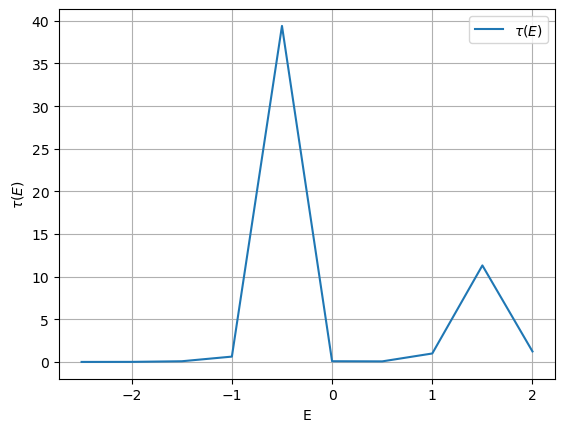

In [7]:
# Graficar tau(E)
plt.plot(E_values, tau_values, label='$\\tau(E)$')
plt.xlabel('E')
plt.ylabel('$\\tau(E)$')
plt.legend()
plt.grid(True)
plt.savefig('transmision-3000.png')

1.8998276590395332e-05